In [ ]:
%matplotlib inline

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nilearn
nilearn.__version__

'0.10.0'

In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib
matplotlib.__version__

'3.6.3'

In [ ]:
# ignore warnings or if you don't want warnings, run below code
import warnings
warnings.simplefilter("ignore") 

#Download Haxby fMRI dataset with Nilearn.

In [ ]:
# This might take a while, depending on your internet speed
from nilearn import datasets
haxby_dataset = datasets.fetch_haxby(data_dir=None,
                                     fetch_stimuli=True)
# by default this function returns images of second subject
# from the Haxby et al. 2001 study


Dataset created in /root/nilearn_data/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


Downloaded 239173632 of 291168628 bytes (82.1%,    0.9s remaining) ...done. (5 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/def37a305edfda829916fa14c9ea08f8/subj2-2010.01.14.tar.gz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/5cd78c74b711572c7f41a5bddb69abca/stimuli-2010.01.14.tar.gz..... done.


In [ ]:
print(haxby_dataset.keys())

dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description', 'stimuli'])


In [ ]:
# 'func' denotes functional image - a path to Nifti file
print(haxby_dataset['func'])

['/root/nilearn_data/haxby2001/subj2/bold.nii.gz']


In [ ]:
# Experimental sessions/events - a path to txt file
print(haxby_dataset['session_target'])

['/root/nilearn_data/haxby2001/subj2/labels.txt']


In [ ]:
# Should be defined in seconds
TR = 2.5

# Load fMRI data
Load the functional image using relevant function from Nilearn. It should represent like ```Nifti1Image``` object.

In [ ]:
from nilearn import image

fmri_img = image.load_img(haxby_dataset['func'])

In [ ]:
# Each volume (3D) is successively acquired in time which makes
# an fMRI image a (4D), simply printing the shape of loaded
# functional image gives you the total number of brain volumes

print(fmri_img.shape)

(40, 64, 64, 1452)


# Load the session/experimental conditions file represented as ”session target” using Pandas.

In [ ]:
# Load target information as string and give a numerical identifier to each

import pandas as pd

behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=' ')

In [ ]:
stimulus = haxby_dataset.stimuli
print(behavioral['labels'].unique())

['rest' 'scissors' 'face' 'cat' 'shoe' 'house' 'scrambledpix' 'bottle'
 'chair']


# NiftiMasker using ROIs as brain masks on fMRI image

## NOTE: You can skip this demo if you want and go to section (Estimate brain response maps using GLM with Nilearn) directly.

### This section is not really needed for GLM estimation but just understands about ROI and BOLD signal strength comparisons across different masks

While downloading the Haxby dataset, we also have various
masks provided by the original authors. These masks are named
as mask_vt.nii.gz, mask_face.nii.gz, mask_house.nii.gz and refers
to ”ventral temporal”, ”face”, ”house” that are generated using
GLM contrast based localizer maps. Use these masks as ROIs
to keep the brain voxels that are responded to the stimuli and
mask out the rest.

In [ ]:
# Grab all mask images provided with the dataset

vt_mask = haxby_dataset['mask_vt'][0]

face_mask = haxby_dataset['mask_face'][0]

house_mask = haxby_dataset['mask_house'][0]

We have seen how to do masking using
```NiftiMasker``` provided mask as input. Plot mean time courses over these three masks using matplotlib → plt.plot. Analyze the BOLD waveform across three masks. Use these filtering choices in ```nilearn.input_data.NiftiMasker``` as parameters for better interpretation of these signals. high_pass=0.008 in secs, standardize=True, detrend=True, t r=2.5, smoothing fwhm=6, mask_strategy='epi'.

In [ ]:
from nilearn.input_data import NiftiMasker

# This masker is using vt
nifti_masker = NiftiMasker(mask_img=vt_mask, mask_strategy='epi')
fmri_vt_masked = nifti_masker.fit_transform(fmri_img)

Plot mean time courses
over these three masks using matplotlib → plt.plot. 

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'No filtering')

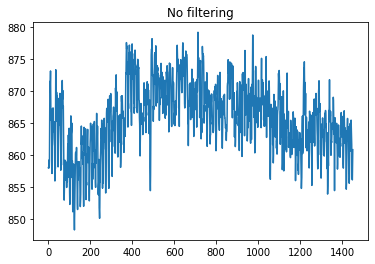

In [ ]:
plt.plot(fmri_vt_masked.mean(axis=1))
plt.title('No filtering')

In [ ]:
# Inspect the filtering choices using vt mask

nifti_masker_filters_vt = NiftiMasker(mask_img=vt_mask, high_pass=0.008,
                                      standardize=True, detrend=True, 
                                      smoothing_fwhm=6., t_r=2.5,
                                      mask_strategy='epi')
fmri_filters_applied_vt_mask = nifti_masker_filters_vt.fit_transform(fmri_img)

Text(0.5, 1.0, 'Filtering applied')

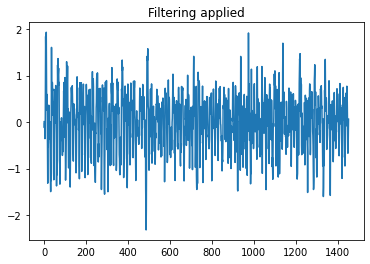

In [ ]:
plt.plot(fmri_filters_applied_vt_mask.mean(axis=1))
plt.title('Filtering applied')

Text(0.5, 1.0, 'Zoom in to 100 timepoints')

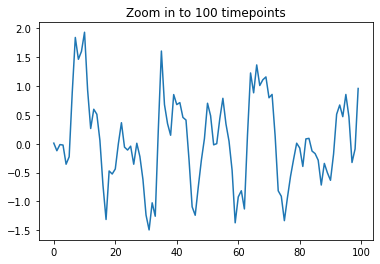

In [ ]:
# Zooming the mean filtered signal to understand
# whether the BOLD phenomena is block like structure
plt.plot(fmri_filters_applied_vt_mask.mean(axis=1)[:100])
plt.title('Zoom in to 100 timepoints')

In [ ]:
# Repeat NiftiMasker, filtering parameters using face mask

nifti_masker_filters_face = NiftiMasker(mask_img=face_mask, high_pass=0.008,
                                        standardize=True, detrend=True, 
                                        smoothing_fwhm=6., t_r=2.5,
                                        mask_strategy='epi')
fmri_filters_applied_face_mask = nifti_masker_filters_face.fit_transform(fmri_img)

In [ ]:
# Repeat NiftiMasker, filtering parameters on house mask

nifti_masker_filters_house = NiftiMasker(mask_img=house_mask, high_pass=0.008,
                                         standardize=True, detrend=True, 
                                         smoothing_fwhm=6., t_r=2.5,
                                         mask_strategy='epi')
fmri_filters_applied_house_mask = nifti_masker_filters_house.fit_transform(fmri_img)

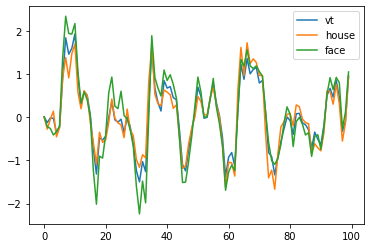

In [ ]:
plt.plot(fmri_filters_applied_vt_mask.mean(axis=1)[:100])
plt.plot(fmri_filters_applied_house_mask.mean(axis=1)[:100])
plt.plot(fmri_filters_applied_face_mask.mean(axis=1)[:100])

plt.legend(['vt', 'house', 'face'])

- High pass is a temporal pre-processing step that eliminates low frequency drifts and other scanner related noise that thought to be reflected with actual time series.
- Standardize will center the signal, for example, signal is zero mean and scaled to unit variance
- Detrend removes the linear trend in the signal

All these steps are temporal pre-processing strategies that needs to be done before fitting a model.

If not accounted properly, noise may influence the results. For example, fitting a model to the noise.

# Estimate brain response maps using GLM with Nilearn.

For simplicity, we
manually take single session fMRI image data and
accordingly prepare an events file for GLM analysis

Prepare an events that acts as information provider to make a design matrix X (inbuilt in the Python object) for GLM analysis. 

What you need to do is prepare events in the form
of dictionary specifying TR as shown below.

Note that we analyze the whole fMRI image by separating
out according to each session.

In [ ]:
conditions = behavioral['labels']
sessions = behavioral['chunks']

unique_sessions = sessions.unique()

# Build events
One way to analyze task fMRI times series consists in comparing them to a model built from our knowledge of the events that occurred during the functional session.

Below code tries to demonstrate preparing events for single session.

In [ ]:
# First session analysis specified as 0

import numpy as np

session = 0

conditions_session = conditions[sessions == session]

n_scans = len(conditions_session)
frame_times = TR * np.arange(n_scans)

duration = TR * np.ones(n_scans)

events = pd.DataFrame(
    {'onset': frame_times,
     'trial_type': conditions_session,
     'duration': duration})

In [ ]:
# Three ingredients that should be user specified in order 
# to make a design matrix through stimulus onset, stimlus
# conditions and duration.

print(events)

     onset trial_type  duration
0      0.0       rest       2.5
1      2.5       rest       2.5
2      5.0       rest       2.5
3      7.5       rest       2.5
4     10.0       rest       2.5
..     ...        ...       ...
116  290.0       rest       2.5
117  292.5       rest       2.5
118  295.0       rest       2.5
119  297.5       rest       2.5
120  300.0       rest       2.5

[121 rows x 3 columns]


In [ ]:
print(conditions.shape)
print(conditions_session.shape)

(1452,)
(121,)


# Build FirstLevelModel aka GLM (initialize)




In [ ]:
from nilearn.glm.first_level import FirstLevelModel

glm = FirstLevelModel(t_r=TR,
                      mask_img=haxby_dataset.mask,
                      high_pass=0.008,
                      smoothing_fwhm=8.)

Smoothing improves Signal-to-Noise ratio (SNR). Gaussian filter specified by Full Width Half Maximum (FWHM).

In [ ]:
from nilearn.image import index_img

fmri_session = index_img(fmri_img, sessions == session)

# fit the glm
glm.fit(fmri_session, events=events)

FirstLevelModel(high_pass=0.008,
                mask_img='/root/nilearn_data/haxby2001/mask.nii.gz',
                smoothing_fwhm=8.0, t_r=2.5)

Dig into the FirstLevelModel and helps us understand what
type of regression technique is used to estimate β maps? Which
software is Nilearn dependent on for that regression technique?
Plotting the output attributes that are saved by the model after glm fit.

Ans: Ordinary Least Squares (OLS)

# Plot the design matrix that was built upon events that we have provided and to generate z scored maps

<AxesSubplot: label='conditions', ylabel='scan number'>

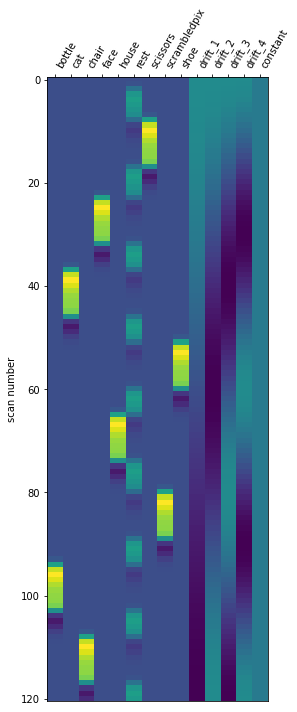

In [ ]:
from nilearn import plotting

plotting.plot_design_matrix(glm.design_matrices_[0])

In [ ]:
print(fmri_session.shape)

(40, 64, 64, 121)


# Detecting voxels with significant effects

To access the estimated coefficients (Betas of the [GLM](https://nilearn.github.io/stable/glossary.html#term-GLM) model), we created [contrast](https://nilearn.github.io/stable/glossary.html#term-contrast) with a single ‘1’ in each of the columns: The role of the [contrast](https://nilearn.github.io/stable/glossary.html#term-contrast) is to select some columns of the model –and potentially weight them– to study the associated statistics. So in a nutshell, a contrast is a weighted combination of the estimated effects. Here we can define canonical contrasts that just consider the two effects in isolation —let’s call them “conditions”— then a [contrast](https://nilearn.github.io/stable/glossary.html#term-contrast) that makes the difference between these conditions.

In [ ]:
# Number of columns corresponds to the number of regressors in the design matrix as can be seen from the above figure.
from numpy import array
contrasts = {
    'bottle': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'cat':   array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'chair':   array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'face':   array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'house':   array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'rest':   array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'scissors':   array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
    'scrambledpix':   array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
    'shoe':   array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
}

# We can then compare the two conditions ‘face’ and ‘rest’ by defining the corresponding contrast:



In [ ]:
face_minus_rest = contrasts['face'] - contrasts['rest']

# Let’s look at it: plot the coefficients of the contrast, indexed by the names of the columns of the design matrix.

<AxesSubplot: label='conditions'>

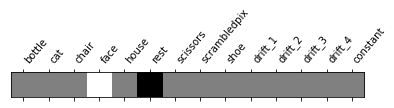

In [ ]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(face_minus_rest, design_matrix=glm.design_matrices_[0])

# Compute the beta-maps

In order to get statistical significance, we form a t-statistic, and directly convert it into z-scale. The z-scale means that the values are scaled to match a standard Gaussian distribution (mean=0, variance=1), across voxels, if there were no effects in the data.


In [ ]:
z_map_face_vs_rest = glm.compute_contrast(face_minus_rest,
                                         output_type='z_score')

```compute_contrast``` function is implemented to compute the contrast maps/statistical maps for each condition. Fitting the ```FirstLevelModel``` does not output the constrast maps. Additionally, we need to call ```compute_contrast``` after model fit to compute the brain mapping response outputs per category.

Those are estimated typically in z score. This [link](https://rstudio-pubs-static.s3.amazonaws.com/52340_0e269434591d4de790f259a330d86c1a.html) tries to answer the meaning of z maps.

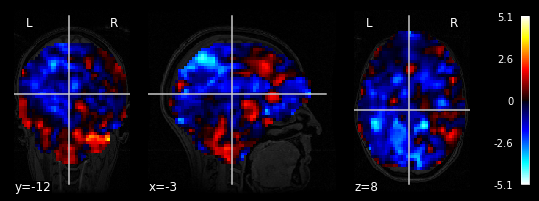

In [ ]:
plotting.plot_stat_map(z_map_face_vs_rest, bg_img=haxby_dataset['anat'][0])

# Interactive visualization

Point the cursor and move along to reveal the slice by slice activations


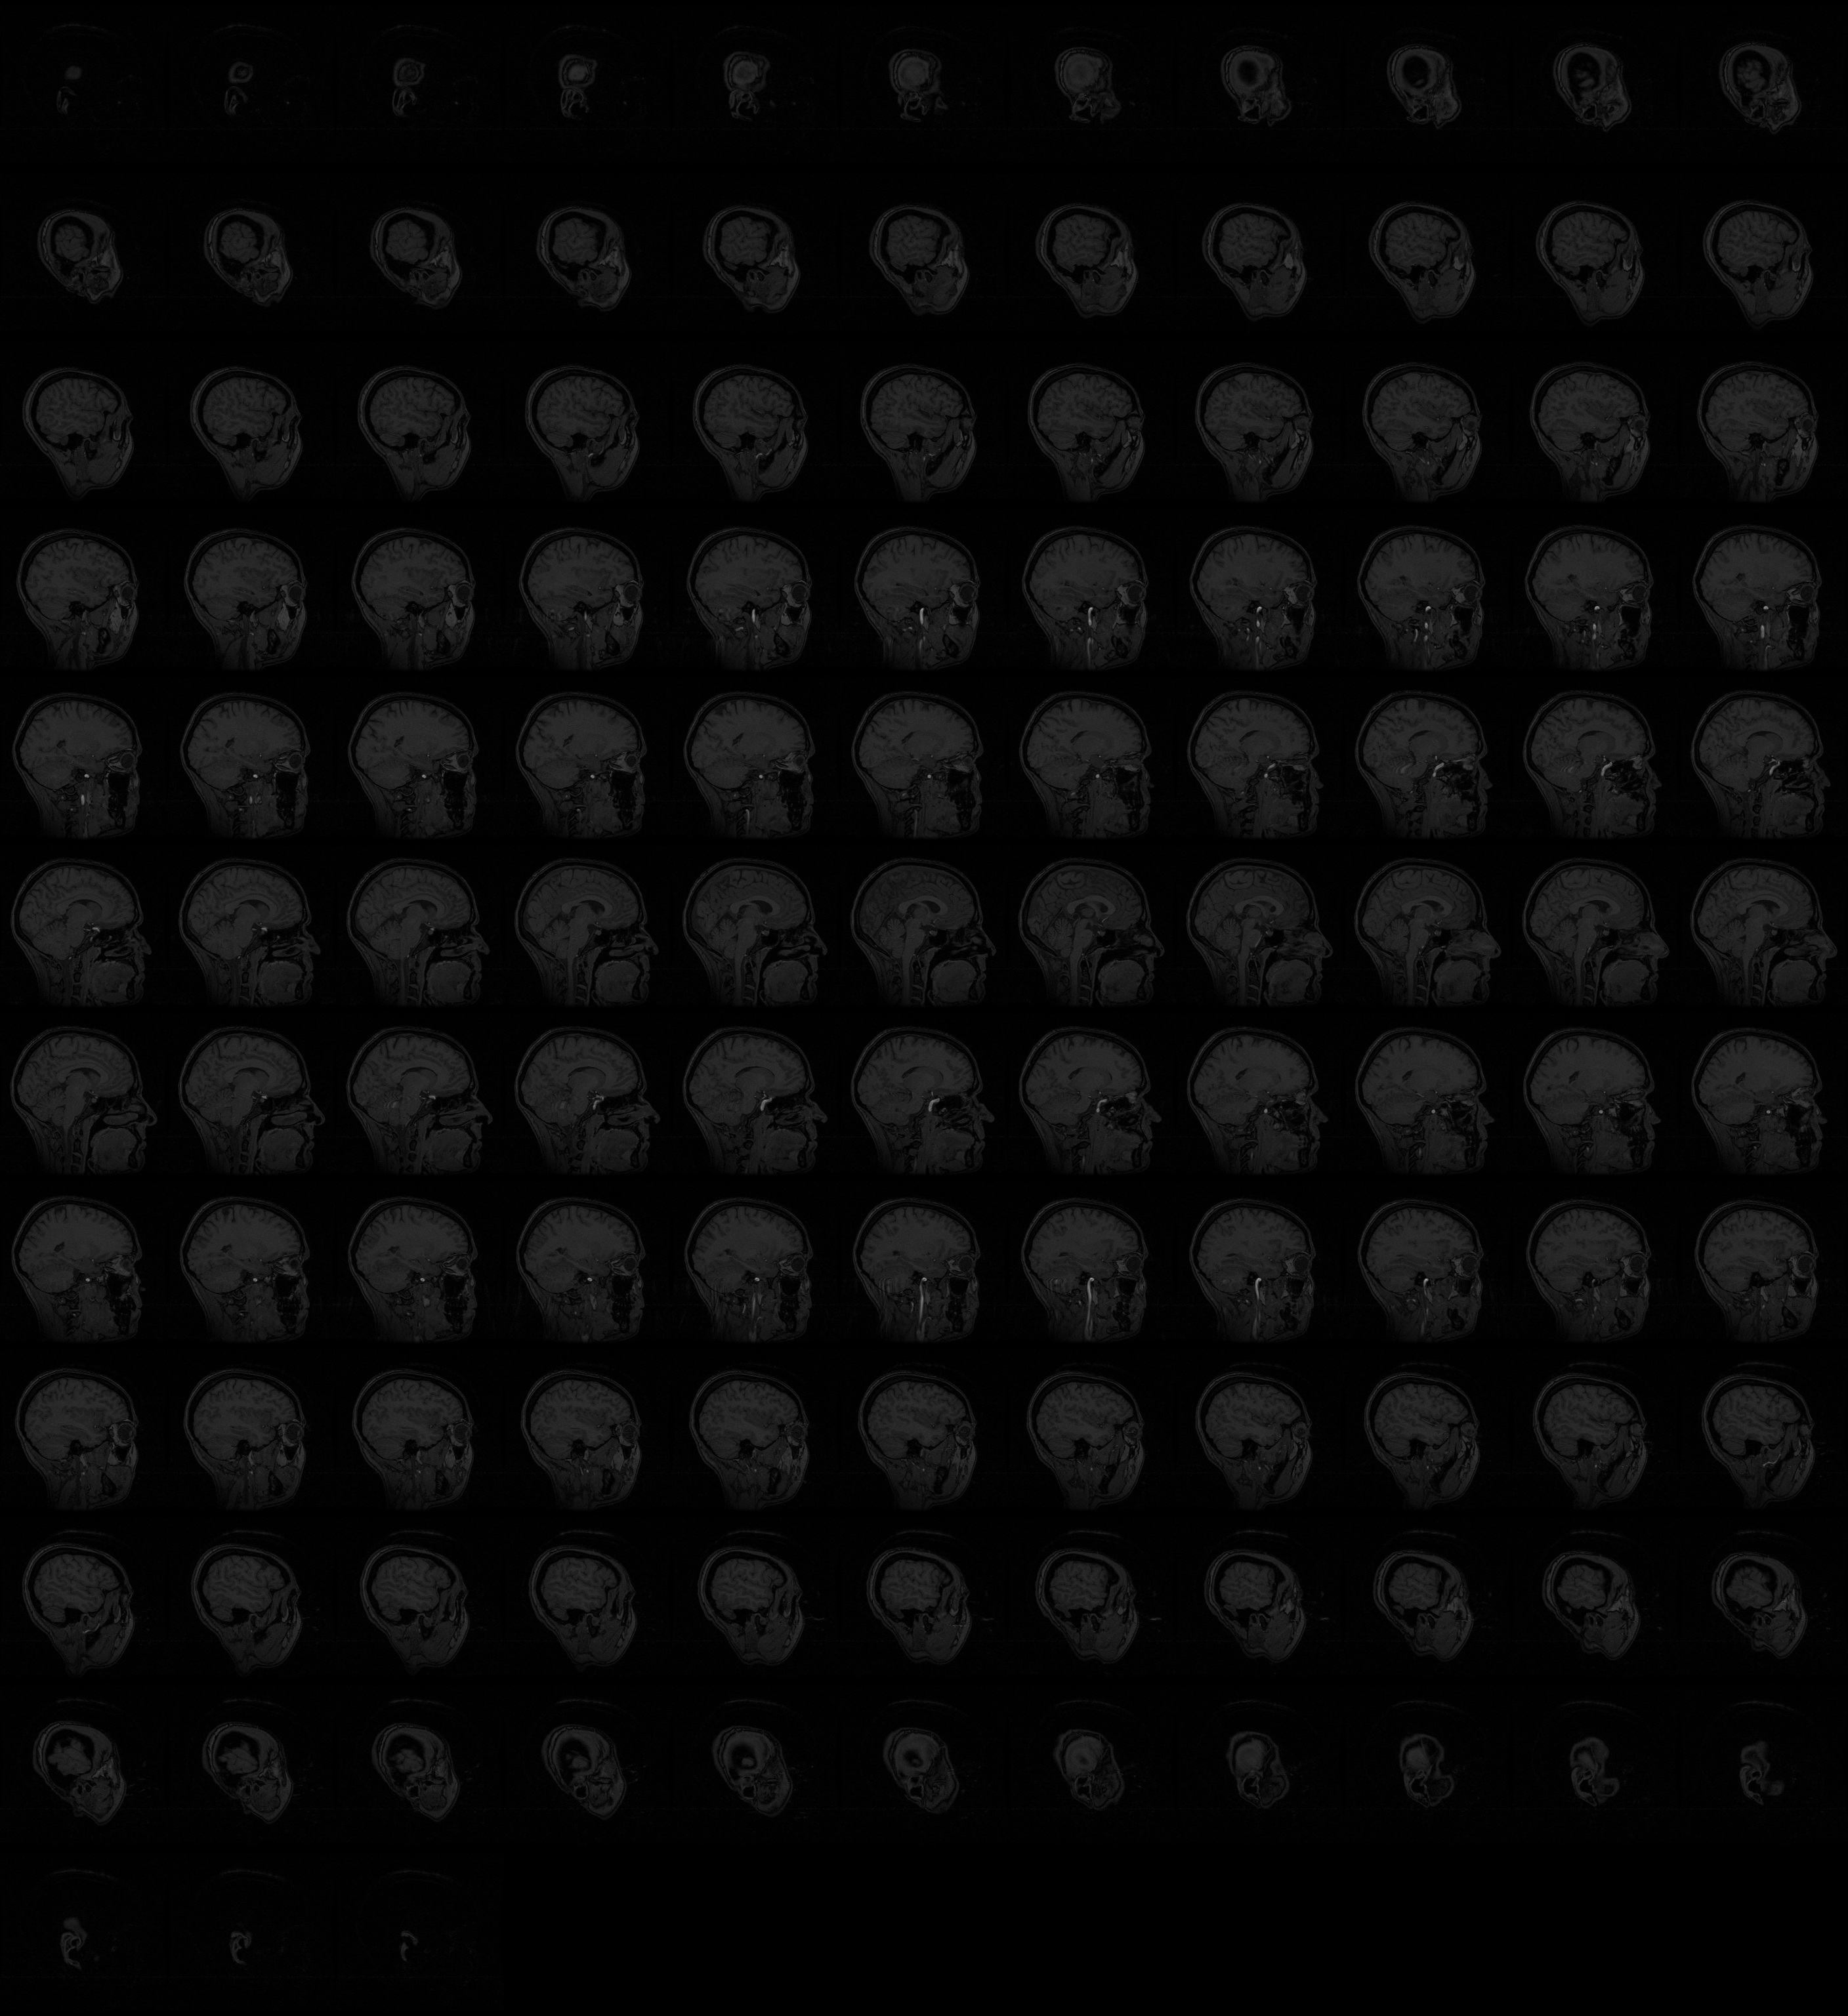
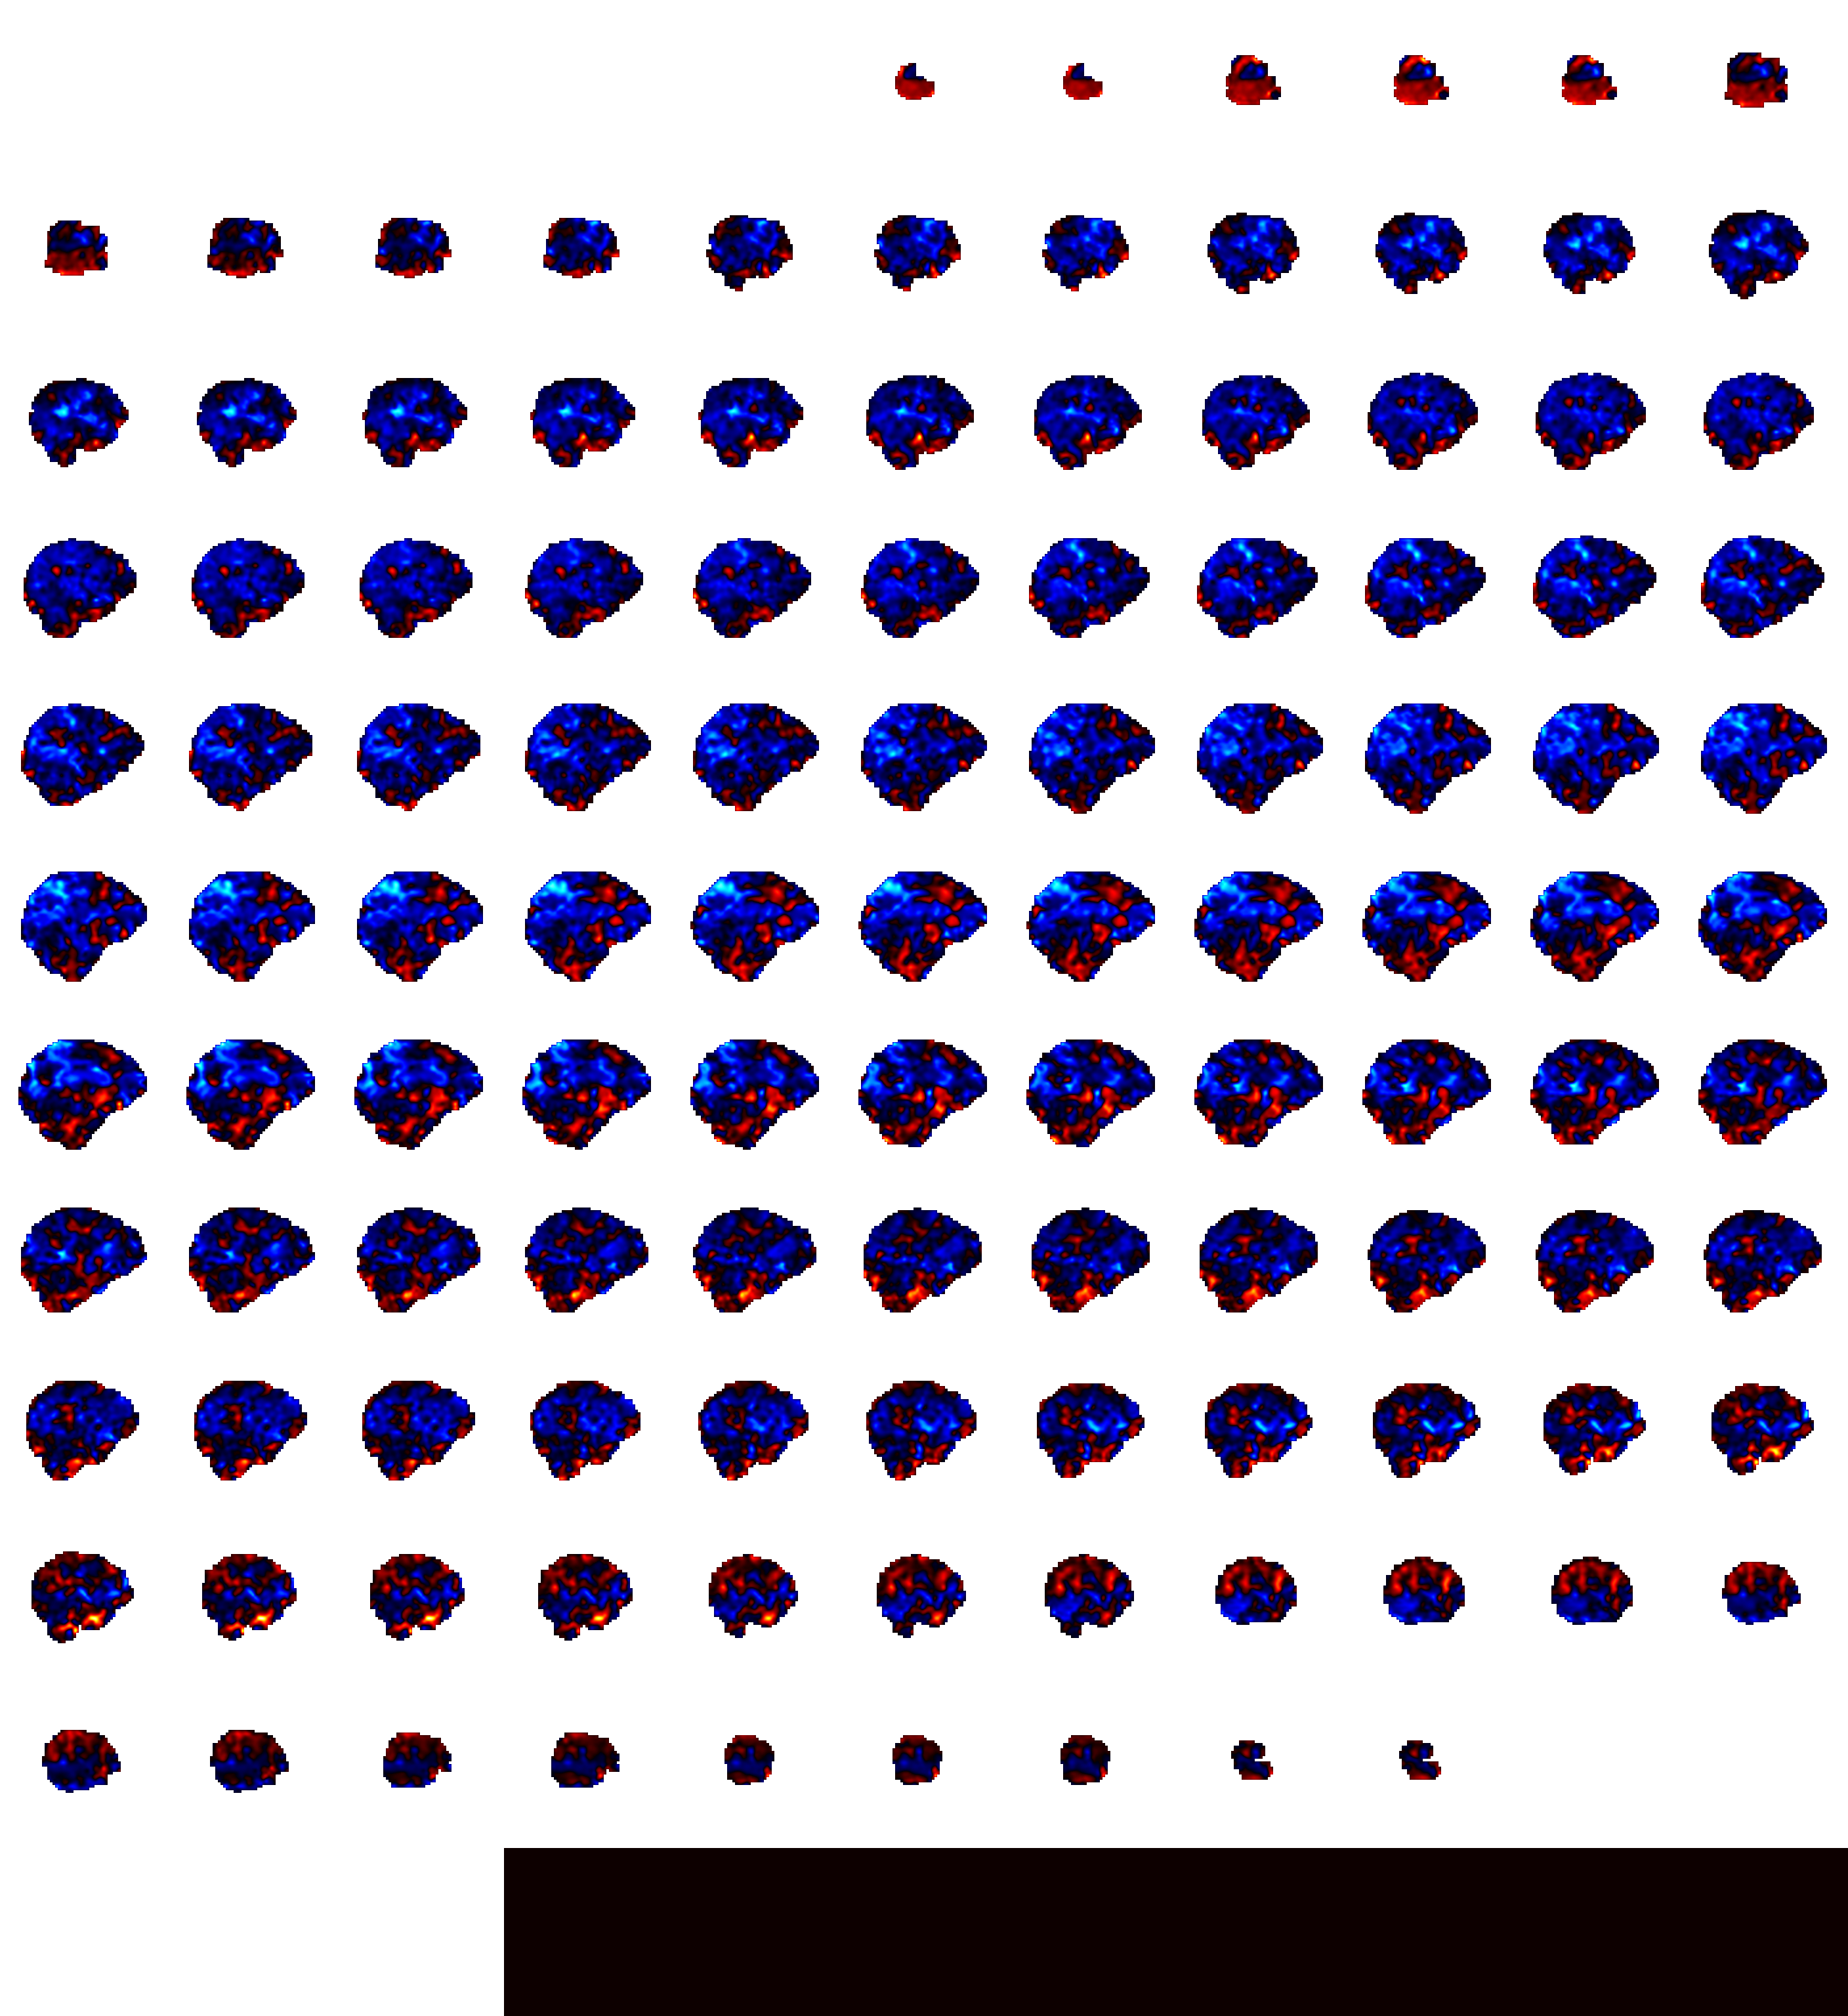

In [ ]:
plotting.view_img(z_map_face_vs_rest, bg_img=haxby_dataset['anat'][0])

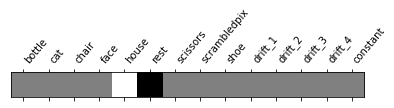

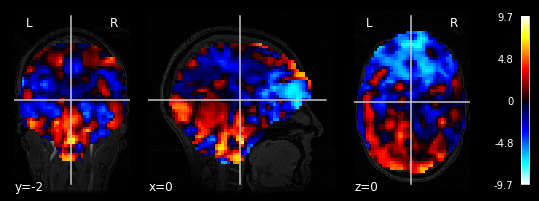

In [ ]:
# Similarly for house versus rest contrast specification
house_minus_rest = contrasts['house'] - contrasts['rest']
plot_contrast_matrix(house_minus_rest, design_matrix=glm.design_matrices_[0])
z_map_house_vs_rest = glm.compute_contrast(house_minus_rest,
                                           output_type='z_score')
plotting.plot_stat_map(z_map_house_vs_rest, bg_img=haxby_dataset['anat'][0])

# Until now you have seen demo about how to estimate β-maps for two contrasting conditions i.e., face vs rest and house vs rest locking data to single session. Repeat the same steps for all contrasting conditions and for all sessions.

Contrasting conditions that we are interested in to predict classification tasks:

- bottle minus rest 
- cat minus rest 
- chair minus rest 
- face minus rest 
- house minus rest 
- scissors minus rest 
- scrambledpix minus rest
- shoe minus rest

# Run GLM for all sessions

Till here, we have seen how to run GLM using ```nilearn.glm.first_level import FirstLevelModel``` on fMRI scans indexing to single session. i.e., first session.

Now, run for all sessions using ```for``` loop to have z-score maps for all sessions

# How to run for all sessions?

First,

1. Prepare events for all sesssions and save each session events pandas data frame into a dictionary.
e.g., ```events = {} ```

Second,

2. Run the instantiated GLM model on each session by grabbing the events of each session that was stored in a dictionary from Step 1. Save z-score maps output for each session and condition.

*   z_maps = [] as input to classification
*   conditions_label = [] prediction targets
*   each_session_label = [] for proper cross-validation

Fill the above empty list by running across all sessions and ```compute_contrast``` maps on each condition within each session.

Overall, all the empty lists should have length of 96.

In [ ]:
# Prepare events for all sessions
events = {} # dictionary of Dataframes, one per session
# TODO

In [ ]:
assert len(events) == 12

for i in events:
    assert events[i].shape == (121, 3)

In [ ]:
# TODO
# Run the GLM for all sessions.
# for each unique session do glm fit and save z-score maps,
# conditions label, sessions label in a empty list below
z_maps = []
conditions_label = []
each_session_label = []

In [ ]:
assert len(z_maps) == 96
assert len(conditions_label) == 96
assert len(each_session_label) == 96

# Take these 3D images that you build using this notebook i.e., statistical maps or β-maps to finish 2nd Objective.